# GUIDE to Worksheet 1.2: The Spread in Distributions

This notebook is meant to provide hints and guidance on how to complete Worksheet 1.2: The Spread in Distributions.  It will not necessarily answer every part of every problem, but it will get you to the interesting points of the worksheet.

As a reminder, this worksheet is an introduction into showing parameter dependence of results, calculating eCDFs and percentiles, and visualizing distributional shapes.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as r
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

In [8]:
def coin_flipper(N_exp, N_coins, p_heads=0.5):
    return np.sum(r.rand(N_exp, N_coins) <= p_heads, axis=1).squeeze()

In [12]:
N_coins = 50
N_exp = 10000

obs_heads = coin_flipper(N_exp, N_coins)
print(f"The shape of 'outcomes' is {obs_heads.shape}")

The shape of 'outcomes' is (10000,)


Based on theory, we expect the number of heads to be binomially distributed.  That is, it will be unimodal with most of the outcomes near $N_{coins}\times p_{heads} = 25$.

In [13]:
print(f"The minimum observed number of heads is {obs_heads.min()}")
print(f"The maximum observed number of heads is {obs_heads.max()}")
print(f"The mean number of heads is {obs_heads.mean():.3g}")
print(f"The median number of heads is {np.median(obs_heads):.3g}")
print(f"The variance in the number of heads is {np.var(obs_heads):.3g}")

The minimum observed number of heads is 11
The maximum observed number of heads is 38
The mean number of heads is 25
The median number of heads is 25
The variance in the number of heads is 12.1


In [19]:
outcomes = np.arange(N_coins+1)  ## Possible outcomes
prob_obs = np.zeros(N_coins+1)

for ii, outcome in enumerate(outcomes):
    prob_obs[ii] = np.sum(obs_heads == outcome) / N_exp
    
print(f"The probability of any outcome is {np.sum(prob_obs):.2%}")

The probability of any outcome is 100.00%


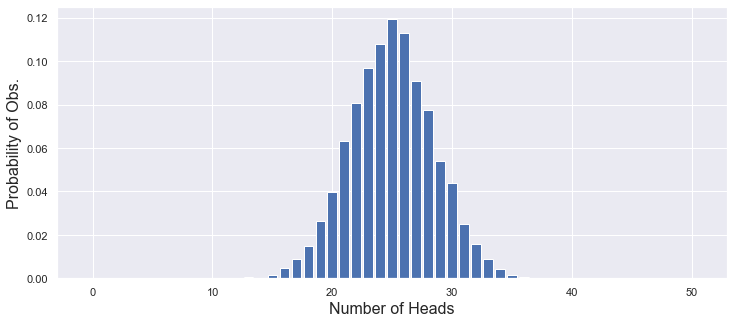

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

_ = ax.bar(outcomes, prob_obs)

_ = ax.set_xlabel("Number of Heads", fontsize=16)
_ = ax.set_ylabel("Probability of Obs.", fontsize=16)

In [21]:
exp_val = 0
for ii, outcome in enumerate(outcomes):
    exp_val += outcome * prob_obs[ii]

obs_var = 0
for ii, outcome in enumerate(outcomes):
    obs_var += (outcome - exp_val)**2 * prob_obs[ii]

print(f"The expected value of the experiment is {exp_val:.3g}")
print(f"The observed variance of the experiment is {obs_var:.3g}")

The expected value of the experiment is 25
The observed variance of the experiment is 12.1


The expected value of the number of heads will probably *increase* with the likelihood of heads and the number of coins that we toss!

In [25]:
N_coins_arr = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])

exp_val_vs_N = np.zeros(len(N_coins_arr))
for nn, N_coins in enumerate(N_coins_arr):
    
    print(f"\nFlipping {N_coins} coins {N_exp} times!")
    
    obs_heads = coin_flipper(N_exp, N_coins)
    
    exp_val = 0
    for outcome in np.arange(N_coins+1):
        if outcome not in obs_heads:  ## What is this doing?
            continue
        
        obs_prob = np.mean(obs_heads == outcome)
        
        exp_val += outcome * obs_prob
    
    exp_val_vs_N[nn] = exp_val
    
    print(f"The expected value is {exp_val:.3g}")


Flipping 10 coins 10000 times!
The expected value is 4.99

Flipping 20 coins 10000 times!
The expected value is 9.99

Flipping 50 coins 10000 times!
The expected value is 25

Flipping 100 coins 10000 times!
The expected value is 50

Flipping 200 coins 10000 times!
The expected value is 100

Flipping 500 coins 10000 times!
The expected value is 250

Flipping 1000 coins 10000 times!
The expected value is 500

Flipping 2000 coins 10000 times!
The expected value is 1e+03

Flipping 5000 coins 10000 times!
The expected value is 2.5e+03

Flipping 10000 coins 10000 times!
The expected value is 5e+03


In [27]:
p_heads_arr = np.linspace(0.1, 0.9, 9)

N_coins = 1000

exp_val_vs_p = np.zeros(len(p_heads_arr))
for pp, p_heads in enumerate(p_heads_arr):
    
    print(f"\nFlipping {N_coins} coins {N_exp} times! (p_heads = {p_heads:.2g})")
    
    obs_heads = coin_flipper(N_exp, N_coins, p_heads=p_heads)
    
    exp_val = 0
    for outcome in np.arange(N_coins+1):
        if outcome not in obs_heads:  ## What is this doing?
            continue
        
        obs_prob = np.mean(obs_heads == outcome)
        
        exp_val += outcome * obs_prob
    
    exp_val_vs_p[pp] = exp_val
    
    print(f"The expected value is {exp_val:.3g}")


Flipping 1000 coins 10000 times! (p_heads = 0.1)
The expected value is 100

Flipping 1000 coins 10000 times! (p_heads = 0.2)
The expected value is 200

Flipping 1000 coins 10000 times! (p_heads = 0.3)
The expected value is 300

Flipping 1000 coins 10000 times! (p_heads = 0.4)
The expected value is 400

Flipping 1000 coins 10000 times! (p_heads = 0.5)
The expected value is 500

Flipping 1000 coins 10000 times! (p_heads = 0.6)
The expected value is 600

Flipping 1000 coins 10000 times! (p_heads = 0.7)
The expected value is 700

Flipping 1000 coins 10000 times! (p_heads = 0.8)
The expected value is 800

Flipping 1000 coins 10000 times! (p_heads = 0.9)
The expected value is 900


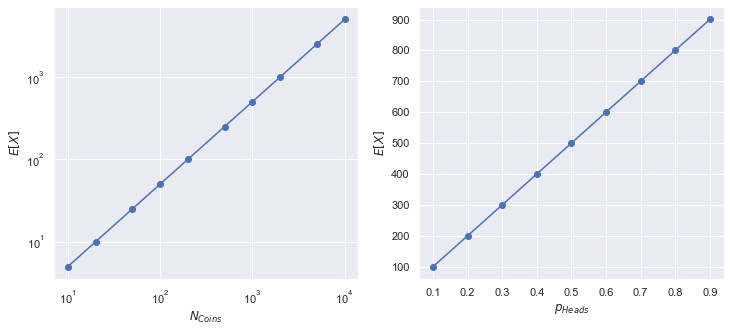

In [32]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

_ = ax1.plot(N_coins_arr, exp_val_vs_N, "-o")

_ = ax1.set_xscale('log')
_ = ax1.set_xlabel(r"$N_{Coins}$")
_ = ax1.set_yscale('log')
_ = ax1.set_ylabel(r"$E[X]$")

_ = ax2.plot(p_heads_arr, exp_val_vs_p, "-o")

_ = ax2.set_xlabel(r"$p_{Heads}$")
_ = ax2.set_ylabel(r"$E[X]$")

In [33]:
exp_val_arr = np.zeros((len(N_coins_arr), len(p_heads_arr)))

for nn, N_coins in enumerate(N_coins_arr):
    print(f"\nFlipping {N_coins} coins {N_exp} times!")
    
    for pp, p_heads in enumerate(p_heads_arr):
        obs_heads = coin_flipper(N_exp, N_coins, p_heads=p_heads)
    
        exp_val = 0
        for outcome in np.arange(N_coins+1):
            if outcome not in obs_heads:  ## What is this doing?
                continue

            obs_prob = np.mean(obs_heads == outcome)

            exp_val += outcome * obs_prob

        exp_val_arr[nn, pp] = exp_val


Flipping 10 coins 10000 times!

Flipping 20 coins 10000 times!

Flipping 50 coins 10000 times!

Flipping 100 coins 10000 times!

Flipping 200 coins 10000 times!

Flipping 500 coins 10000 times!

Flipping 1000 coins 10000 times!

Flipping 2000 coins 10000 times!

Flipping 5000 coins 10000 times!

Flipping 10000 coins 10000 times!


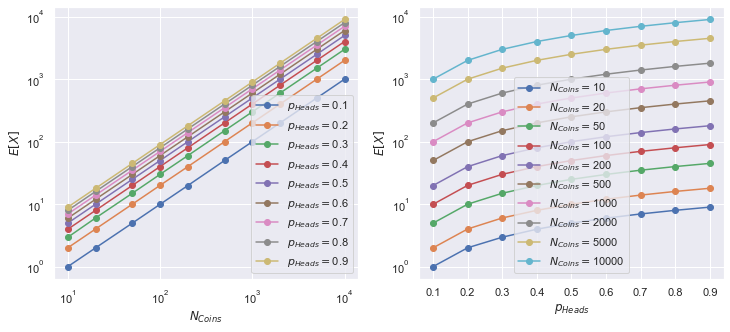

In [35]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

for pp, p_heads in enumerate(p_heads_arr):
    _ = ax1.plot(N_coins_arr, exp_val_arr[:, pp], "-o",
                 label=r"$p_{Heads} = $" +f"{p_heads:.2g}")

for nn, N_coins in enumerate(N_coins_arr):
    _ = ax2.plot(p_heads_arr, exp_val_arr[nn], "-o",
                 label=r"$N_{Coins} = $" +f"{N_coins}")

_ = ax1.set_xscale('log')
_ = ax1.set_xlabel(r"$N_{Coins}$")
_ = ax1.set_yscale('log')
_ = ax1.set_ylabel(r"$E[X]$")
_ = ax1.legend()


_ = ax2.set_xlabel(r"$p_{Heads}$")
_ = ax2.set_yscale('log')
_ = ax2.set_ylabel(r"$E[X]$")
_ = ax2.legend()

In [36]:
obs_var_arr = np.zeros((len(N_coins_arr), len(p_heads_arr)))

for nn, N_coins in enumerate(N_coins_arr):
    print(f"\nFlipping {N_coins} coins {N_exp} times!")
    
    for pp, p_heads in enumerate(p_heads_arr):
        obs_heads = coin_flipper(N_exp, N_coins, p_heads=p_heads)
            
        for outcome in np.arange(N_coins+1):
            if outcome not in obs_heads:  ## What is this doing?
                continue

            obs_prob = np.mean(obs_heads == outcome)

            obs_var += (outcome - exp_val_arr[nn, pp])**2 * obs_prob

        obs_var_arr[nn, pp] = obs_var


Flipping 10 coins 10000 times!

Flipping 20 coins 10000 times!

Flipping 50 coins 10000 times!

Flipping 100 coins 10000 times!

Flipping 200 coins 10000 times!

Flipping 500 coins 10000 times!

Flipping 1000 coins 10000 times!

Flipping 2000 coins 10000 times!

Flipping 5000 coins 10000 times!

Flipping 10000 coins 10000 times!


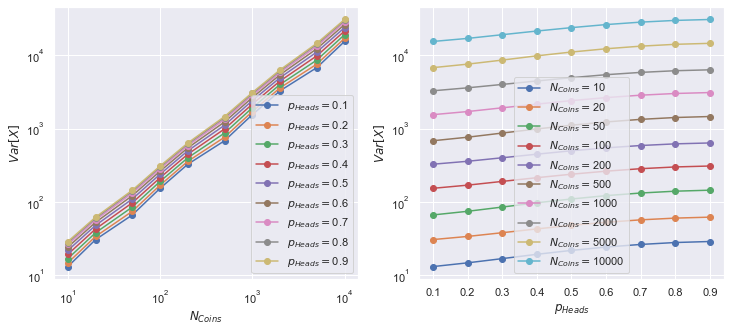

In [37]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

for pp, p_heads in enumerate(p_heads_arr):
    _ = ax1.plot(N_coins_arr, obs_var_arr[:, pp], "-o",
                 label=r"$p_{Heads} = $" +f"{p_heads:.2g}")

for nn, N_coins in enumerate(N_coins_arr):
    _ = ax2.plot(p_heads_arr, obs_var_arr[nn], "-o",
                 label=r"$N_{Coins} = $" +f"{N_coins}")

_ = ax1.set_xscale('log')
_ = ax1.set_xlabel(r"$N_{Coins}$")
_ = ax1.set_yscale('log')
_ = ax1.set_ylabel(r"$Var[X]$")
_ = ax1.legend()


_ = ax2.set_xlabel(r"$p_{Heads}$")
_ = ax2.set_yscale('log')
_ = ax2.set_ylabel(r"$Var[X]$")
_ = ax2.legend()

In [38]:
from collections import Counter

N_exp = 200
N_coins = 100
p_heads = 0.5

obs_heads = coin_flipper(N_exp, N_coins, p_heads=p_heads)

head_counts = Counter(obs_heads)
head_vals = np.msort(list(head_counts.keys()))
eCDF = np.cumsum([head_counts[val] for val in head_vals])
eCDF = eCDF / eCDF[-1]

In [44]:
perc_10_idx = np.where(eCDF < 0.1)[0] ## Why do we need the [0]?
print(perc_10_idx)
perc_10 = head_vals[perc_10_idx[-1]+1]
print(f"The 10th percentile is {perc_10}")
## Confirm:
print(np.percentile(obs_heads, 10))

perc_25_idx = np.where(eCDF < 0.25)[0]
print(perc_25_idx)
perc_25 = head_vals[perc_25_idx[-1]+1]
print(f"The 25th percentile is {perc_25}")
## Confirm:
print(np.percentile(obs_heads, 25))

perc_50_idx = np.where(eCDF < 0.5)[0]
print(perc_50_idx)
perc_50 = head_vals[perc_50_idx[-1]+1]
print(f"The 50th percentile is {perc_50}")
## Confirm:
print(np.percentile(obs_heads, 50))

perc_75_idx = np.where(eCDF < 0.75)[0]
print(perc_75_idx)
perc_75 = head_vals[perc_75_idx[-1]+1]
print(f"The 75th percentile is {perc_75}")
## Confirm:
print(np.percentile(obs_heads, 75))

perc_90_idx = np.where(eCDF < 0.9)[0]
print(perc_90_idx)
perc_90 = head_vals[perc_90_idx[-1]+1]
print(f"The 90th percentile is {perc_90}")
## Confirm:
print(np.percentile(obs_heads, 90))

[0 1 2 3 4]
The 10th percentile is 43
43.900000000000006
[0 1 2 3 4 5 6 7 8]
The 25th percentile is 47
47.0
[ 0  1  2  3  4  5  6  7  8  9 10 11]
The 50th percentile is 50
50.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
The 75th percentile is 53
53.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
The 90th percentile is 56
56.0


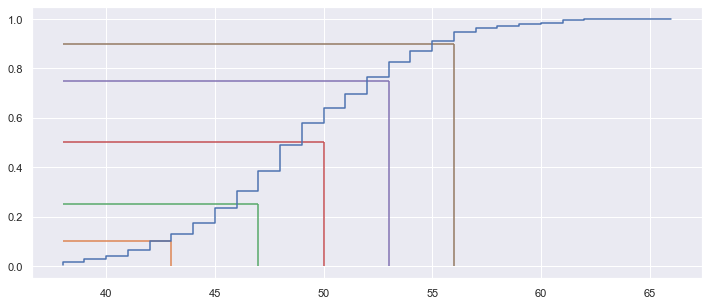

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

_ = ax.step(head_vals, eCDF, label='Obs. Heads')

_ = ax.hlines(0.1, head_vals.min(), perc_10, color='C1',
              label=r'$P(X\leq x)=0.1$')
_ = ax.vlines(perc_10, 0, 0.1, color='C1')

_ = ax.hlines(0.25, head_vals.min(), perc_25, color='C2',
              label=r'$P(X\leq x)=0.25$')
_ = ax.vlines(perc_25, 0, 0.25, color='C2')

_ = ax.hlines(0.5, head_vals.min(), perc_50, color='C3',
              label=r'$P(X\leq x)=0.5$')
_ = ax.vlines(perc_50, 0, 0.5, color='C3')

_ = ax.hlines(0.75, head_vals.min(), perc_75, color='C4',
              label=r'$P(X\leq x)=0.75$')
_ = ax.vlines(perc_75, 0, 0.75, color='C4')

_ = ax.hlines(0.9, head_vals.min(), perc_90, color='C5',
              label=r'$P(X\leq x)=0.9$')
_ = ax.vlines(perc_90, 0, 0.9, color='C5')

_ = ax.set_xlabel("Number of Heads")
_ = ax.set_ylabel("Cumulative Probability")
_ = ax.legend()

In [52]:
median_arr = np.zeros((len(N_coins_arr), len(p_heads_arr)))
iqr_arr = np.zeros((len(N_coins_arr), len(p_heads_arr)))

for nn, N_coins in enumerate(N_coins_arr):
    print(f"\nFlipping {N_coins} coins {N_exp} times!")
    
    for pp, p_heads in enumerate(p_heads_arr):
        obs_heads = coin_flipper(N_exp, N_coins, p_heads=p_heads)

        median_arr[nn, pp] = np.median(obs_heads)
        
        tmp = np.percentile(obs_heads, [25, 75])
        
        iqr_arr[nn, pp] = tmp[1] - tmp[0]
        


Flipping 10 coins 200 times!

Flipping 20 coins 200 times!

Flipping 50 coins 200 times!

Flipping 100 coins 200 times!

Flipping 200 coins 200 times!

Flipping 500 coins 200 times!

Flipping 1000 coins 200 times!

Flipping 2000 coins 200 times!

Flipping 5000 coins 200 times!

Flipping 10000 coins 200 times!


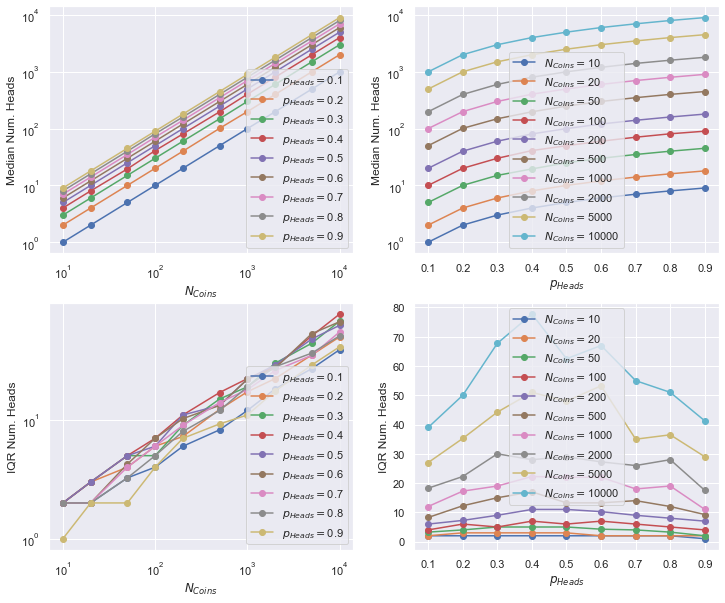

In [57]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12, 10))

for pp, p_heads in enumerate(p_heads_arr):
    _ = ax1.plot(N_coins_arr, median_arr[:, pp], "-o",
                 label=r"$p_{Heads} = $" +f"{p_heads:.2g}")
    _ = ax3.plot(N_coins_arr, iqr_arr[:, pp], "-o",
                 label=r"$p_{Heads} = $" +f"{p_heads:.2g}")

for nn, N_coins in enumerate(N_coins_arr):
    _ = ax2.plot(p_heads_arr, median_arr[nn], "-o",
                 label=r"$N_{Coins} = $" +f"{N_coins}")
    
    _ = ax4.plot(p_heads_arr, iqr_arr[nn], "-o",
                 label=r"$N_{Coins} = $" +f"{N_coins}")

_ = ax1.set_xscale('log')
_ = ax1.set_xlabel(r"$N_{Coins}$")
_ = ax1.set_yscale('log')
_ = ax1.set_ylabel("Median Num. Heads")
_ = ax1.legend()

_ = ax2.set_xlabel(r"$p_{Heads}$")
_ = ax2.set_yscale('log')
_ = ax2.set_ylabel("Median Num. Heads")
_ = ax2.legend()


_ = ax3.set_xscale('log')
_ = ax3.set_xlabel(r"$N_{Coins}$")
_ = ax3.set_yscale('log')
_ = ax3.set_ylabel("IQR Num. Heads")
_ = ax3.legend()

_ = ax4.set_xlabel(r"$p_{Heads}$")
_ = ax4.set_ylabel("IQR Num. Heads")
_ = ax4.legend()

In [56]:
iqr_arr

array([[ 2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  1.  ],
       [ 2.  ,  3.  ,  3.  ,  3.  ,  3.  ,  2.  ,  2.  ,  2.  ,  2.  ],
       [ 3.25,  4.  ,  5.  ,  5.  ,  5.  ,  4.25,  4.  ,  3.25,  2.  ],
       [ 4.  ,  6.  ,  5.  ,  7.  ,  6.  ,  7.  ,  6.  ,  5.  ,  4.  ],
       [ 6.  ,  7.25,  9.  , 11.  , 11.  , 10.25,  9.  ,  8.  ,  7.  ],
       [ 8.25, 12.25, 15.  , 17.  , 13.25, 13.25, 14.  , 12.  ,  9.25],
       [12.  , 17.25, 19.  , 22.25, 22.  , 22.  , 18.  , 19.  , 11.  ],
       [18.25, 22.25, 30.  , 28.  , 29.  , 27.25, 26.  , 28.  , 17.5 ],
       [27.  , 35.25, 44.25, 51.  , 48.  , 53.25, 35.  , 36.5 , 29.  ],
       [39.  , 50.  , 67.75, 77.75, 62.5 , 67.  , 55.  , 51.  , 41.25]])

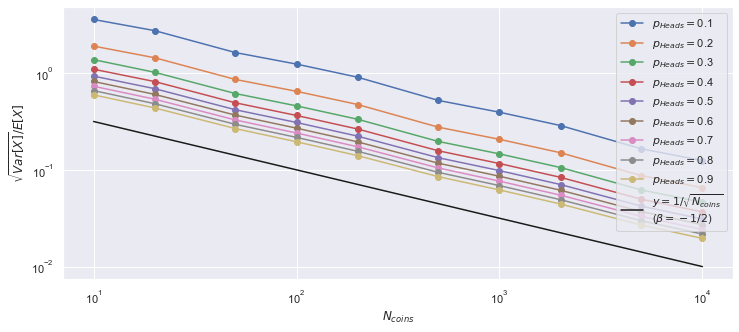

In [63]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

for pp, p_heads in enumerate(p_heads_arr):
    _ = ax1.plot(N_coins_arr, 
                 np.sqrt(obs_var_arr[:, pp])/exp_val_arr[:, pp], "-o",
                 label=r"$p_{Heads} = $" +f"{p_heads:.2g}")
    
_ = ax1.plot(N_coins_arr, N_coins_arr**(-0.5), '-k',
             label=r'$y = 1/\sqrt{N_{coins}}$' + "\n" + r"($\beta = -1/2$)")

_ = ax1.set_xscale('log')
_ = ax1.set_xlabel(r"$N_{coins}$")
_ = ax1.set_yscale('log')
_ = ax1.set_ylabel(r"$\sqrt{Var[X]} / E[X]$")
_ = ax1.legend()